# Abstract
 
Notebook outline:

+ Step 1, we collect the data about used cars, identify important features that reflect the price.
+ Step 2, we preprocess and remove entries with NA values. Discard features that are not relevant for the prediction of the price.
+ Step 3, we apply ML models on the preprocessed dataset with features as inputs and the price as output.


In [195]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# I. INTRODUCTION

The prices of new cars in the industry is fixed by the manufacturer with some additional costs incurred by the Government in the form of taxes. So customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales are on a global increase. Predicting the prices of used cars is an interesting and much-needed problem to be addressed. Customers can be widely exploited by fixing unrealistic prices for the used cars and many falls into this trap. Therefore, rises an absolute necessity of a used car price prediction system to effectively determine the worthiness of the car using a variety of features. Due to the adverse pricing of cars and the nomadic nature of people in developed countries, the cars are mostly bought on a lease basis, where there is an agreement between the buyer and seller. These cars upon completion of the agreement are resold. So reselling has become an essential part of today’s world. 

Given the description of used cars, the prediction of used cars is not an easy task. There are a variety of features of a car like the age of the car, its make, the origin of the car (the original country of the manufacturer), its mileage (the number of mildes it has run) and its horsepower. Due to rising fuel prices, fuel economy is also of prime importance. Other factors such as the type of fuel it uses, style, braking system, the volume of its cylinders (measured in cc), acceleration, the number of doors, safety index, size, weight, height, paint color, consumer reviews, prestigious awards won by the car manufacturer.

Other options such as sound system, air conditioner, power steering, cosmic wheels, GPS navigator all may influence the
price as well.

# II. DATA SET AND PREPROCESSING

We use dataset from Kaggle for used car price prediction. The dataset contains various features that are required to predict and classify the range of prices of used cars.

In [ ]:
data = pd.read_csv('/content/sample_data/train-data.csv')
test = pd.read_csv('/content/sample_data/test-data.csv')

Firstly, we imported some basic Libraries.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

And Libraries for ML

In [ ]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

In [ ]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

Let's drop the 'New_Price' and 'Unnamed:0' columns.

In [ ]:
data = data.drop('New_Price', axis=1)
data = data.drop('Unnamed: 0', axis=1)

test = test.drop('New_Price', axis=1)
test = test.drop('Unnamed: 0', axis=1)

And, drop all NaN data.

In [ ]:
data = data.dropna(how='any')
test = test.dropna(how='any')

In [ ]:
data.shape

(5975, 12)

In [ ]:
test.shape

(1223, 11)

For this dataset ưe found one point very interesting for the Name of the vehicle. We noticed that there weren't any rules for vehicle naming, and duting the prediction step, we reconigned that the names of the vehicles in train_data and test_data are very different and not predictable. We check the following:

In [ ]:
listtrain = data['Name']
listtest = test['Name']
  
# prints the missing in listrain 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: {'Mahindra Bolero Power Plus ZLX', 'Hyundai Xcent 1.2 CRDi SX', 'Chevrolet Enjoy TCDi LS 7 Seater', 'Hyundai Creta 1.6 SX Automatic', 'Ford Classic 1.4 Duratorq CLXI', 'Honda BRV i-DTEC V MT', 'Toyota Corolla Altis GL', 'Fiat Avventura Urban Cross 1.3 Multijet Emotion', 'Volkswagen Vento 1.5 TDI Highline Plus', 'Honda Amaze E i-DTEC', 'Toyota Camry MT with Moonroof', 'Mahindra Xylo H9', 'Toyota Etios Cross 1.2L G', 'Hyundai EON 1.0 Kappa Magna Plus', 'Mahindra KUV 100 D75 K8 5Str', 'Mercedes-Benz CLA 45 AMG', 'Mercedes-Benz S Class 2005 2013 320 L', 'Mahindra Thar 4X4', 'Maruti Swift AMT ZXI', 'Maruti Vitara Brezza ZDi Plus AMT', 'Hyundai i20 2015-2017 Magna Optional 1.4 CRDi', 'Maruti Ciaz VXi', 'Skoda Rapid Ultima 1.6 TDI Ambition Plus', 'Hyundai Creta 1.6 SX Diesel', 'Honda CR-V Diesel', 'Mitsubishi Pajero Sport 4X2 AT', 'Ford Ikon 1.4 ZXi', 'Chevrolet Sail Hatchback 1.2', 'Hindustan Motors Contessa 2.0 DSL', 'Toyota Land Cruiser Prado VX L', 'Chevrolet

Therefore, we decided to create a new column under the name "Cars" to distinguish the car make & model. We have noticed that some authors have used the coding of vehicle names by specifying each vehicle as a separate code and conducting train and prediction, which is probably not LOGICAL.

In [ ]:
data['Cars'] = data['Name'].str.split(" ").str[0] + ' ' +data['Name'].str.split(" ").str[1]
test['Cars'] = test['Name'].str.split(" ").str[0] + ' ' +test['Name'].str.split(" ").str[1]

In [ ]:
set(test['Cars']).issubset(set(data['Cars']))

False

Now, check again, and efectively, there are only 7 cars in the test data set are missing from the train data set. Fine, we drop these items.

In [ ]:
listtrain = data['Cars']
listtest = test['Cars']
  
# prints the missing and additional elements in list1 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: {'Isuzu MU', 'OpelCorsa 1.4Gsi', 'Nissan 370Z', 'Bentley Flying', 'Toyota Land', 'Fiat Abarth', 'Hindustan Motors'}


In [ ]:
test.drop(test[test['Cars'].isin(['Toyota Land', 'Hindustan Motors', 'Fiat Abarth', 'Nissan 370Z', 
                                  'Isuzu MU', 'Bentley Flying', 'OpelCorsa 1.4Gsi'])].index, inplace = True)

In [ ]:
test.shape

(1216, 12)

In [ ]:
listtrain = data['Cars']
listtest = test['Cars']
  
# prints the missing and additional elements in list1 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: set()


In [ ]:
data.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz


Now, we will convert all data of columns "Mileage", "Engine", "Power", "Seats" into float.

In [ ]:
data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
data['Mileage'] = data['Mileage'].str.replace(' km/kg','')
data['Engine'] = data['Engine'].str.replace(' CC','')
data['Power'] = data['Power'].str.replace('null bhp','112')
data['Power'] = data['Power'].str.replace(' bhp','')

test['Mileage'] = test['Mileage'].str.replace(' kmpl','')
test['Mileage'] = test['Mileage'].str.replace(' km/kg','')
test['Engine'] = test['Engine'].str.replace(' CC','')
test['Power'] = test['Power'].str.replace('null bhp','112')
test['Power'] = test['Power'].str.replace(' bhp','')

In [ ]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Cars                 0
dtype: int64

In [ ]:
test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Cars                 0
dtype: int64

In [ ]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Cars                  object
dtype: object

In [ ]:
data['Mileage'] = data['Mileage'].astype(float)
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)

test['Mileage'] = test['Mileage'].astype(float)
test['Mileage'] = test['Mileage'].astype(float)
test['Engine'] = test['Engine'].astype(float)
test['Power'] = test['Power'].astype(float)

In [ ]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,18.179408,1621.606695,113.254882,5.278828,9.501647
std,3.247238,9.155851e+04,4.521801,601.036987,53.415632,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,0.440000
25%,2012.000000,3.390800e+04,15.200000,1198.000000,77.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,98.600000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [ ]:
feature = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
           'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']
data = pd.DataFrame(data, columns=feature)

feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
test = pd.DataFrame(test, columns=feature1)

# III. EXPLORATORY DATA ANALYSIS


In [ ]:
data.head(3)

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50


Now, let's check the Price first.

Skewness: 3.334741
Kurtosis: 17.073183


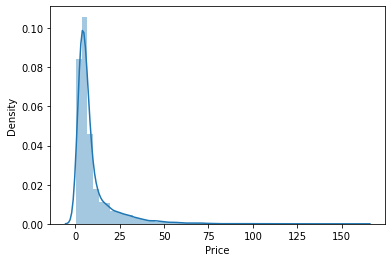

In [ ]:
sns.distplot(data['Price'])

print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

We can observe that the distribution of prices shows a high positive skewness to the left (skew > 1). A kurtosis value of 17 is very high, meaning that there is a profusion of outliers in the dataset.

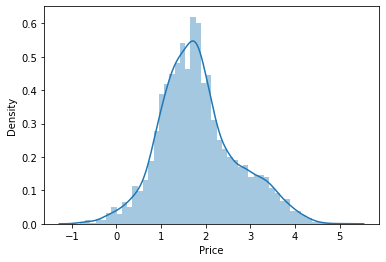

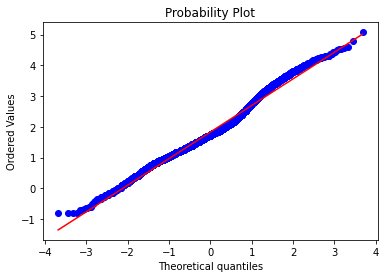

In [ ]:
#applying log transformation
data['Price'] = np.log(data['Price'])
#transformed histogram and normal probability plot
#sns.distplot(data['Price']);
sns.distplot(data['Price'], fit=None);
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)

We found that converting the value of Price to Log(Price) might be a good solution to have a more normal visualization of the distribution of the Price, however, this alternative has no major or decisive effect on the results of the train and/ or predict procedure in the next section. Therefore, in order not to complicate matters, we decided to keep the whole processed database up to this step to analyze the parameters' correlations and conduct the modeling in the following section.

# RELATIONSHIP OF PRICE WITH OTHER PARAMETER

In [ ]:
# Find most important features relative to target Price
print("Find most important features relative to Price-target")
corr = data.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Find most important features relative to Price-target
Price                1.000000
Power                0.755995
Engine               0.687712
Year                 0.503999
Seats                0.163818
Kilometers_Driven   -0.047187
Mileage             -0.265965
Name: Price, dtype: float64


In [ ]:
px.treemap(data.groupby(by='Fuel_Type').sum().reset_index(), path=['Fuel_Type'], labels='Fuel_Type', 
           values='Price', title='Price vs Fuel_type')

Wow, Diesel vehicles are the majority, NOT petrole cars.

In [ ]:
yprop = 'Price'
xprop = 'Power'
h= 'Fuel_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [ ]:
yprop = 'Price'
xprop = 'Engine'
h= 'Transmission'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

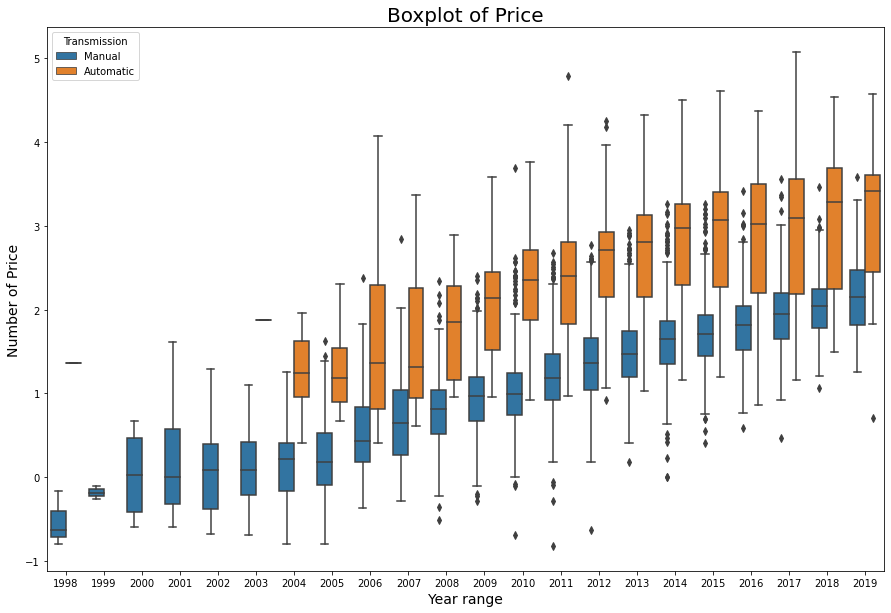

In [ ]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

Yeah ! "New" cars are more expensive than "Old" cars, and Automatic cars are more costly.

In [ ]:
yprop = 'Price'
xprop = 'Year'
h= 'Owner_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")
#fig.update_layout(xaxis_range=[0,5e5])

It's quite BIZZA that, the THIRD OWNER' CARS are sometime more expensive than the second-hand :)

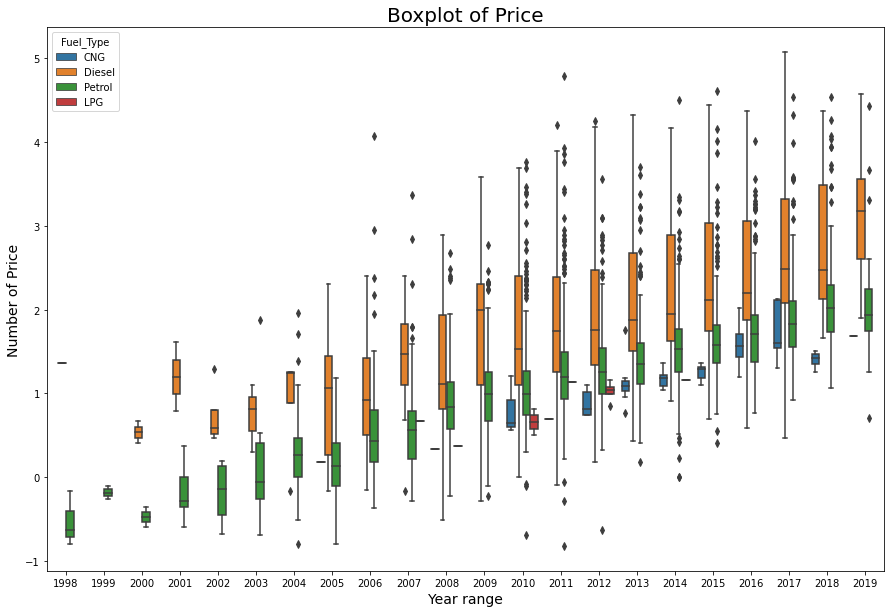

In [ ]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Fuel_Type')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [ ]:
fig = px.box(data, x='Fuel_Type',y='Price', color='Transmission', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

Again, this confirmed that the Petrol vehicle is cheaper than the Diesel.

In [ ]:
px.violin(data, y='Price', x='Seats', color=None, box=True, points="all", hover_data=data.columns)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['Fuel_Type'], values=data['Price'], hole=.3)])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

# IV. MODEL DESCRIPTION



**A. Data preparation & Model Parameters**

In this Notebook, we do not discuss in deep about the Models' parameters, we just applied the standard or refer to previous recommendations. Let's copy the database.

In [ ]:
import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

And then, coding the categorical parameters using LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols] = data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

In [ ]:
df_test.head(2)

,Cars,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,106,4,0,1,0,2014,40929,32.26,998.0,58.2,4.0
1,106,3,3,1,2,2013,54493,24.70,796.0,47.3,5.0


In [ ]:
df_train.head(2)

,Cars,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,124,9,0,1,0,2010,72000,26.60,998.0,58.16,5.0,0.559616
1,65,10,1,1,0,2015,41000,19.67,1582.0,126.20,5.0,2.525729


**B. Training and Testing**

We split our dataset into training, testing data with a 70:30 split ratio. The splitting was done by picking at random which results in a balance between the training data and testing data amongst the whole dataset. This is done to avoid overfitting and enhance generalization. Finaly, we selected 11 characters in the dataset to train the model.

In [ ]:
ftrain = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
          'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']

def Definedata():
    # define dataset
    data2 = df_train[ftrain]
    X = data2.drop(columns=['Price']).values
    y0 = data2['Price'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

Now, we create different functions to calculate deviations, important features and graphical illustration.

In [ ]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

Firstly, take a quick look at the correlation matrix.

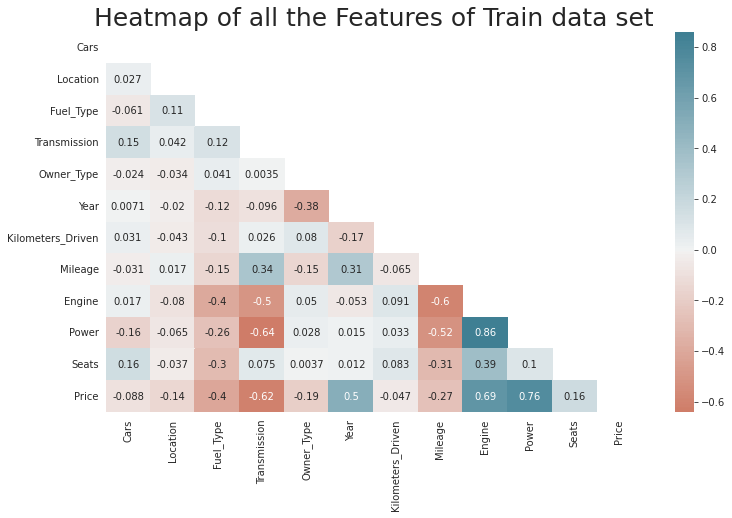

In [ ]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

**C. Models comparison**

The model score is the coefficient of determination R2 of the prediction. In total, we have examinated 9 models to train/predict the used cars price.

In [ ]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [ ]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

[10:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set
3,MLPRegressor,220.450114,0.700872,0.595285
4,AdaBoostRegressor,149.916202,0.826603,0.812834
0,DecisionTreeRegressor,109.722968,0.999993,0.899741
1,XGBRegressor,89.537562,0.947161,0.933236
5,GradientBoostingRegressor,88.266979,0.948270,0.935118
2,RandomForestRegressor,83.595076,0.991962,0.941804


Now we will do hyperparameter tuning and try to improve our last 3 algorithms and see who can give us the best accuracy.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
from sklearn.model_selection import GridSearchCV

In [102]:
parameters = {'n_estimators':[1000,2000,3000],'ccp_alpha':[0,0.1,0.5],'oob_score':['True','False']}
reg = RandomForestRegressor(random_state=0)
clf=GridSearchCV(reg, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'ccp_alpha': 0, 'n_estimators': 3000, 'oob_score': 'True'}

		Error Table
Mean Absolute Error      :  60.47785370218112
Mean Squared  Error      :  6825.506945408411
Root Mean Squared  Error :  82.61662632550673
Accuracy on Traing set   :  0.9780785027796808
Accuracy on Testing set  :  0.943158750597802


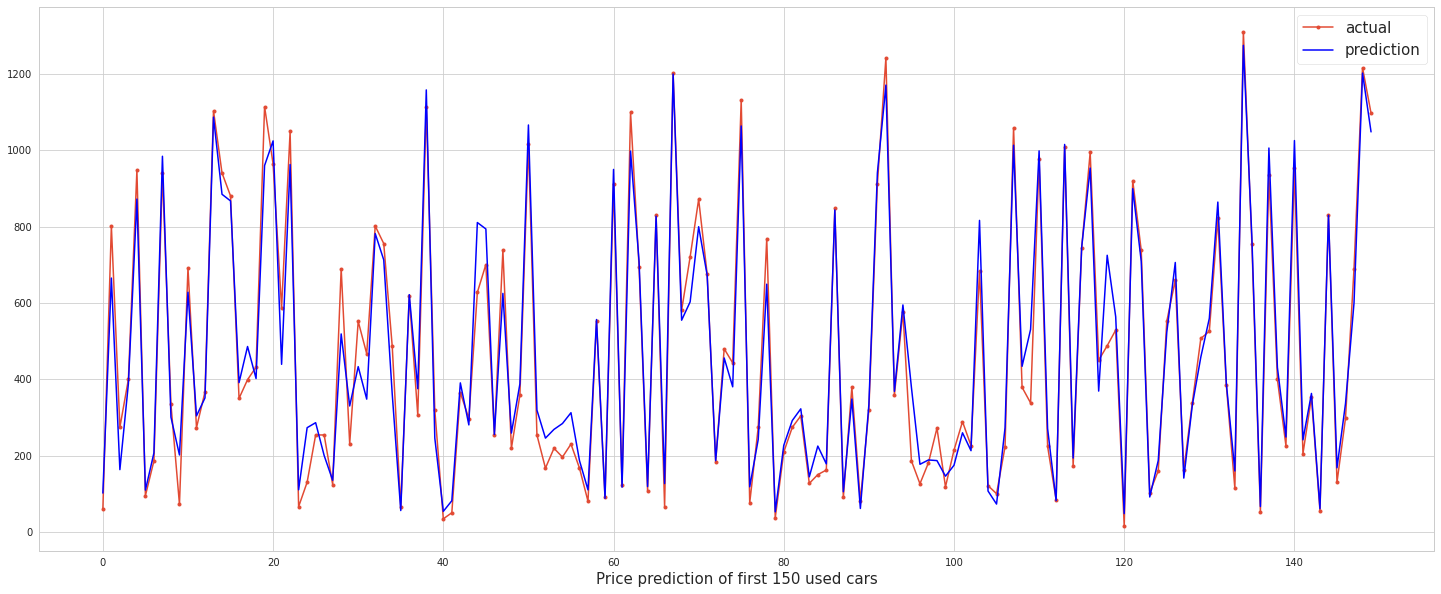

In [114]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=None,oob_score=True,ccp_alpha=10))
Graph_prediction(150, y_actual, y_predicted)

In [92]:
parameters = {'learning_rate':[0.1],'min_samples_split':[2],'max_depth':[3],'n_estimators':[1000,2000,3000],'ccp_alpha':[0,0.1,0.5]}
reg = GradientBoostingRegressor(random_state=0)
clf=GridSearchCV(reg, parameters)
clf.fit(X_train, y_train)
clf.best_params_

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'ccp_alpha': [0, 0.1, 0.5], 'learning_rate': [0.1],
                         'max_depth': [3], 'min_samples_split': [2],
                         'n_estimators': [1000, 2000, 3000]})

		Error Table
Mean Absolute Error      :  46.63423409779084
Mean Squared  Error      :  4603.570960050877
Root Mean Squared  Error :  67.849620190911
Accuracy on Traing set   :  0.9922767952140612
Accuracy on Testing set  :  0.9616625216011248


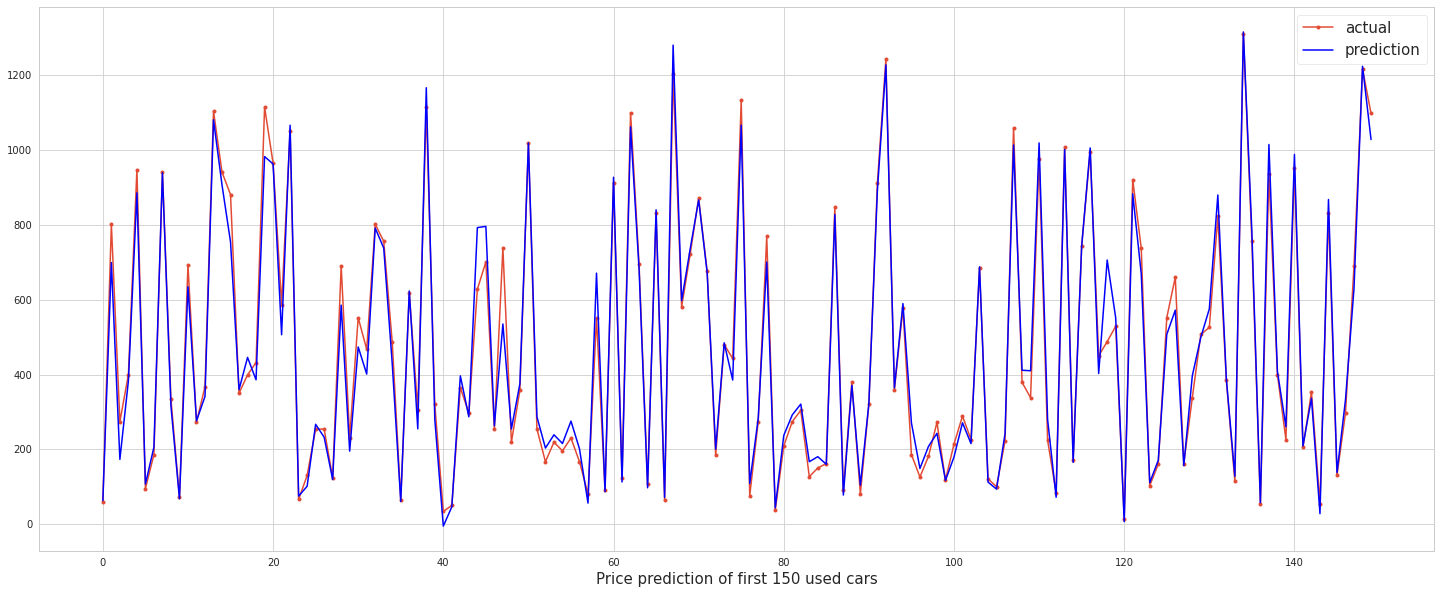

In [98]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, learning_rate=0.1,n_estimators=2000,min_samples_split=2,max_depth=3,ccp_alpha=0.02))
Graph_prediction(150, y_actual, y_predicted)

In [194]:
reg = XGBRegressor(random_state=0)
## Hyper Parameter Optimization
n_estimators = [1800, 1200]
max_depth = [4]
min_child_weight=[3,4,5]
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'min_child_weight':min_child_weight,
    }
random_cv = RandomizedSearchCV(estimator=reg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            random_state=42)

random_cv.fit(X_train, y_train)

random_cv.best_estimator_

[15:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

XGBRegressor(max_depth=4, min_child_weight=3, n_estimators=1200)

[15:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
		Error Table
Mean Absolute Error      :  46.27642982629927
Mean Squared  Error      :  4603.320779577589
Root Mean Squared  Error :  67.84777652640939
Accuracy on Traing set   :  0.9938831557482418
Accuracy on Testing set  :  0.9616646050464704


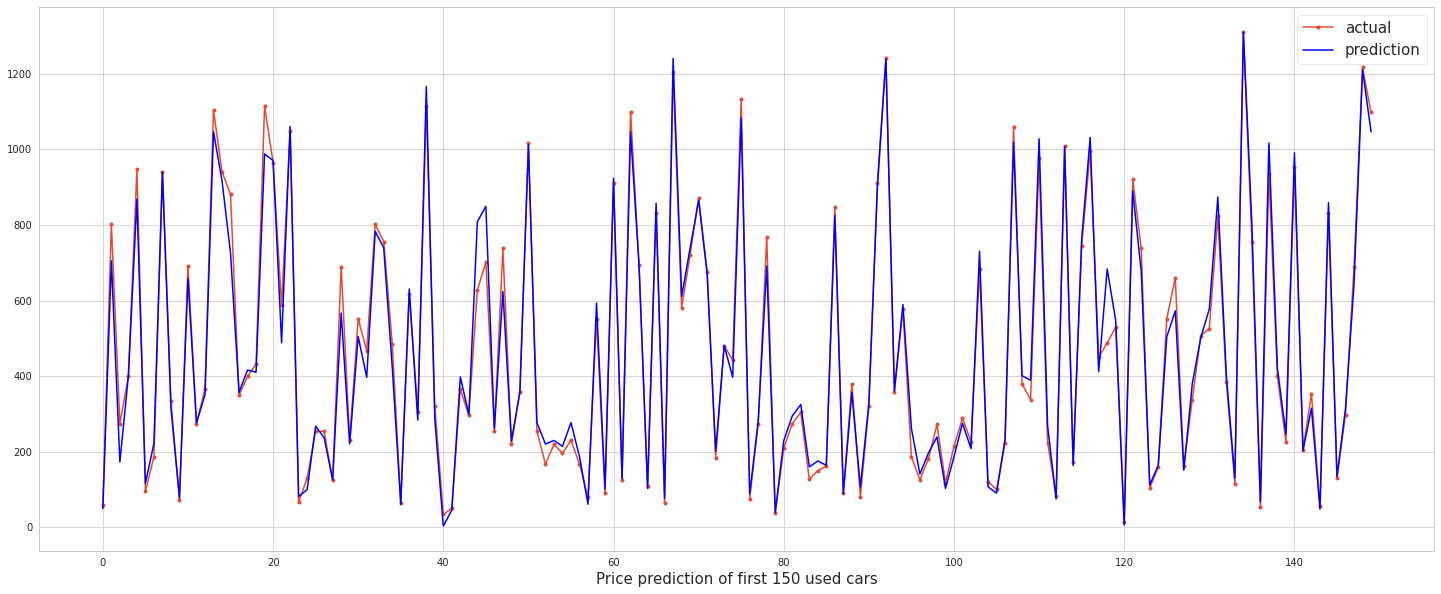

In [197]:
y_predicted, y_actual = Models(XGBRegressor(gamma=55,random_state=21, max_depth=4, min_child_weight=4, n_estimators=1200))
Graph_prediction(150, y_actual, y_predicted)

In [ ]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(10)

,Prediction,Test Data,Abs error,AAD%
0,58.088497,60,1.911503,3.185839
1,698.224271,802,103.775729,12.939617
2,173.363825,274,100.636175,36.728531
3,388.248249,400,11.751751,2.937938
4,874.105128,948,73.894872,7.794818
5,110.571423,95,15.571423,16.390971
6,198.584577,186,12.584577,6.765902
7,932.145471,941,8.854529,0.940970
8,324.964986,334,9.035014,2.705094
9,58.051893,72,13.948107,19.372370


In [ ]:
model = GradientBoostingRegressor(random_state=21, n_estimators=5000)
feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']

X0 = df_test[feature1]
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
model.fit(X_train,y_train)
y_predicted = model.predict(X0)

final = pd.DataFrame({'Car_id':test.index,'Price':y_predicted}) 
final.head(10)

,Car_id,Price
0,0,229.220688
1,1,157.300412
2,2,933.110908
3,3,237.274792
4,4,273.766839
5,5,758.443125
6,6,1032.597871
7,7,122.656552
8,8,166.785100
9,9,751.605876


In [ ]:
filename = 'final.csv'
final.to_csv(filename,index=True)
print('Saved file: ' + filename)

Saved file: final.csv


# V. CONCLUSION

This Notebook evaluates used-car price prediction using dataset which gives the best accuracy of 96.16% for test data and
99.3% for train-data. Being a sophisticated model,XGBRegressor and GradientBoostingRegressor both  gives almost the same and  BEST accuracy in comparison to all prior works using these datasets.